# 1. Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Importando bases de dados

In [6]:
listings_csv_small = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2023-12-26/visualisations/listings.csv", sep=',',encoding='utf-8')

In [7]:
listings_csv_full = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2023-12-26/data/listings.csv.gz", sep=',',encoding='utf-8')

In [8]:
listings_csv_small.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

# 3. Iniciando Analises

In [9]:
listings_csv = listings_csv_small[['neighbourhood']]

In [10]:
media_por_bairro = listings_csv_small.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

KeyError: 'Column not found: price'

In [ ]:
mediana_por_bairro = listings_csv.

In [26]:
listings_csv.groupby('neighbourhood').agg({'price':['mean', 'max','min', 'std'], 'neighbourhood':'count'}).sort_values(by=('price','mean'), ascending=False)

price                                 neighbourhood
                            mean       max     min           std         count
neighbourhood                                                                 
São Cristóvão        8674.779221  552637.0    50.0  63460.223323            81
Estácio              8478.032787  500000.0    55.0  63982.082255            62
Joá                  7879.917910   34819.0   200.0   8278.115345           135
São Conrado          2487.029326   45517.0    80.0   4675.802256           363
Jacarezinho          1949.000000    1949.0  1949.0           NaN             1
...                          ...       ...     ...           ...           ...
Vicente de Carvalho   137.500000     236.0    39.0    139.300036             2
Jardim América        135.000000     180.0    90.0     63.639610             2
Gericinó              110.000000     110.0   110.0           NaN             1
Mangueira              73.000000      73.0    73.0           NaN             1
Magalhães Bastos             NaN       NaN     NaN           NaN             1

[156 rows x 5 columns]

In [27]:
listings_csv[listings_csv['price']==552637.0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
5571,13879989,Home in Rio de Janeiro · 1 bedroom · 4 beds · ...,82046629,Elizabeth,NaN,São Cristóvão,-22.89993,-43.23033,Shared room,552637.0,6,0,NaN,NaN,1,365,0,NaN


In [31]:
listings_csv['neighbourhood'].nunique()

156

In [38]:
bairros = ['Copacabana','Leblon', 'Ipanema', 'Barra da Tijuca', 'Recreio dos Bandeirantes', 'São Cristóvão']

In [41]:
listings_csv[listings_csv['neighbourhood'].isin(bairros)].boxplot(column='price', by='neighbourhood')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,Condo in Rio de Janeiro · ★4.70 · 2 bedrooms ·...,68997,Matthias,NaN,Copacabana,-22.965990,-43.179400,Entire home/apt,1357.0,5,311,2023-12-22,1.90,1,269,29,NaN
2,326205,Condo in Rio de Janeiro · ★4.57 · 1 bedroom · ...,1603206,Bob,NaN,Copacabana,-22.968250,-43.182370,Entire home/apt,366.0,3,152,2023-11-21,1.07,5,293,14,NaN
3,25026,Rental unit in Rio de Janeiro · ★4.72 · 1 bedr...,102840,Viviane,NaN,Copacabana,-22.977350,-43.191050,Entire home/apt,865.0,2,275,2023-12-03,1.67,1,228,29,NaN
4,326575,Rental unit in Rio de Janeiro · ★4.81 · 2 bedr...,1668565,Maria José,NaN,Copacabana,-22.976960,-43.189330,Entire home/apt,368.0,4,227,2023-11-21,1.58,1,245,12,NaN
7,35764,Loft in Rio de Janeiro · ★4.90 · 1 bedroom · 1...,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.981070,-43.191360,Entire home/apt,373.0,3,454,2023-12-17,2.82,1,62,36,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35999,1053716797020259779,Rental unit in Rio de Janeiro · ★New · 1 bedro...,154114238,Breno,NaN,Barra da Tijuca,-23.010436,-43.357412,Entire home/apt,889.0,2,2,2023-12-27,2.00,4,55,2,NaN
36001,1053736263866696090,Rental unit in Rio de Janeiro · ★New · 1 bedro...,13411812,Fernando,NaN,Copacabana,-22.969913,-43.188015,Entire home/apt,760.0,2,0,NaN,NaN,16,87,0,NaN
36002,1053743193407023650,Rental unit in Rio de Janeiro · ★New · 1 bedro...,113031534,João,NaN,Barra da Tijuca,-23.003550,-43.340740,Entire home/apt,600.0,1,0,NaN,NaN,2,264,0,NaN
36004,1053756202332288557,Rental unit in Rio de Janeiro · ★New · 1 bedro...,6000862,Omar Do Rio,NaN,Copacabana,-22.980547,-43.195863,Entire home/apt,727.0,2,0,NaN,NaN,185,358,0,NaN


<Axes: title={'center': 'price'}, xlabel='neighbourhood'>

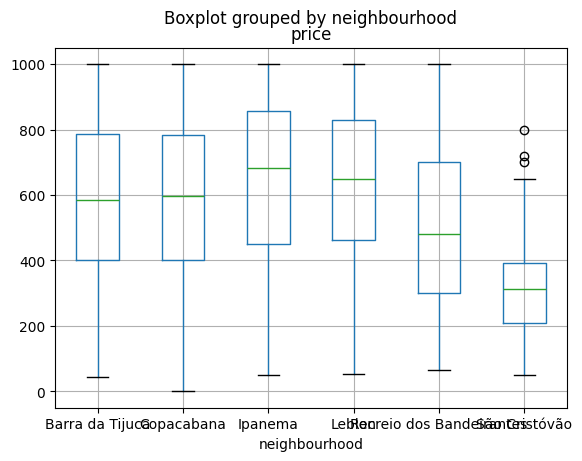

In [47]:
listings_csv[(listings_csv['neighbourhood'].isin(bairros))&(listings_csv['price'] <= 1000)].boxplot(column='price', by='neighbourhood')

In [32]:
listings_csv['neighbourhood'].unique()

array(['Copacabana', 'Flamengo', 'Laranjeiras', 'Santa Teresa', 'Tijuca',
       'Ipanema', 'Jardim Botânico', 'Jacarepaguá', 'Barra da Tijuca',
       'Leblon', 'Joá', 'Leme', 'Botafogo', 'Vila da Penha', 'Centro',
       'Lagoa', 'Gávea', 'Vidigal', 'Recreio dos Bandeirantes',
       'Santo Cristo', 'Itanhangá', 'São Conrado', 'Praça Seca',
       'Humaitá', 'Urca', 'Glória', 'Vargem Pequena', 'Saúde',
       'Alto da Boa Vista', 'Cosme Velho', 'Vargem Grande',
       'Penha Circular', 'Taquara', 'Jardim Sulacap', 'Rocinha',
       'Estácio', 'Rio Comprido', 'Praça da Bandeira', 'Cosmos', 'Gamboa',
       'Bonsucesso', 'Barra de Guaratiba', 'Piedade', 'Bangu',
       'Senador Camará', 'Catete', 'Maracanã', 'Curicica', 'Engenho Novo',
       'Vila Isabel', 'Andaraí', 'Cidade Nova', 'São Francisco Xavier',
       'Guaratiba', 'Anil', 'Cachambi', 'Lins de Vasconcelos',
       'Santa Cruz', 'Marechal Hermes', 'Todos os Santos', 'Cavalcanti',
       'Paciência', 'Freguesia (Jacarepaguá)',

In [30]:
listings_csv[listings_csv['neighbourhood']=='Copacabana'].sort_values(by='price', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
20385,695828287387937123,Rental unit in Rio de Janeiro · 1 bedroom · 1 ...,238544772,Cesar,NaN,Copacabana,-22.974730,-43.188900,Entire home/apt,500000.0,1,0,NaN,NaN,19,365,0,NaN
23637,788962801007153491,Rental unit in Rio de Janeiro · 1 bedroom · 1 ...,235177717,Claudio,NaN,Copacabana,-22.964909,-43.175426,Entire home/apt,214786.0,5,1,2023-01-06,0.08,20,179,1,NaN
9265,30173737,Rental unit in Copacabana · 3 bedrooms · 4 bed...,22953806,Luiz Alberto,NaN,Copacabana,-22.973060,-43.187050,Entire home/apt,189982.0,500,0,NaN,NaN,1,88,0,NaN
18659,612413603184031875,Rental unit in Copacabana · 1 bedroom · 8 beds...,238544772,Cesar,NaN,Copacabana,-22.976910,-43.190360,Entire home/apt,100000.0,1,0,NaN,NaN,19,365,0,NaN
20583,700229188583061802,Rental unit in Rio de Janeiro · 1 bedroom · 1 ...,238544772,Cesar,NaN,Copacabana,-22.975210,-43.190060,Private room,100000.0,1,0,NaN,NaN,19,365,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35741,1051492501168881113,Rental unit in Rio de Janeiro · ★New · 1 bedro...,110584800,João,NaN,Copacabana,-22.974953,-43.192939,Entire home/apt,NaN,1,0,NaN,NaN,1,214,0,NaN
35770,1051686206206032677,Rental unit in Rio de Janeiro · ★New · 2 bedro...,33863632,Camila,NaN,Copacabana,-22.985502,-43.190358,Entire home/apt,NaN,1,0,NaN,NaN,1,269,0,NaN
35829,1052843288066858070,Rental unit in Rio de Janeiro · ★New · 1 bedro...,320390582,Diego,NaN,Copacabana,-22.980402,-43.190776,Private room,NaN,1,0,NaN,NaN,2,233,0,NaN
35849,1052879651207461245,Rental unit in Rio de Janeiro · ★New · 1 bedro...,320390582,Diego,NaN,Copacabana,-22.980402,-43.190776,Entire home/apt,NaN,6,0,NaN,NaN,2,6,0,NaN


In [18]:
media_por_bairro

neighbourhood
São Cristóvão          8674.779221
Estácio                8478.032787
Joá                    7879.917910
São Conrado            2487.029326
Jacarezinho            1949.000000
                          ...     
Vicente de Carvalho     137.500000
Jardim América          135.000000
Gericinó                110.000000
Mangueira                73.000000
Magalhães Bastos               NaN
Name: price, Length: 156, dtype: float64

In [14]:
listings_csv['neighbourhood'].value_counts(ascending=False)

Copacabana                  10982
Barra da Tijuca              3501
Ipanema                      3455
Recreio dos Bandeirantes     1804
Leblon                       1742
                            ...  
Jacarezinho                     1
Acari                           1
Complexo do Alemão              1
Gericinó                        1
Manguinhos                      1
Name: neighbourhood, Length: 156, dtype: int64

In [13]:
listings_csv.mean()


KeyboardInterrupt



In [9]:
listings_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36008 entries, 0 to 36007
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36008 non-null  int64  
 1   name                            36008 non-null  object 
 2   host_id                         36008 non-null  int64  
 3   host_name                       35999 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   36008 non-null  object 
 6   latitude                        36008 non-null  float64
 7   longitude                       36008 non-null  float64
 8   room_type                       36008 non-null  object 
 9   price                           34237 non-null  float64
 10  minimum_nights                  36008 non-null  int64  
 11  number_of_reviews               36008 non-null  int64  
 12  last_review                     

In [12]:
listings_csv.describe()[['price',
                         'minimum_nights',
                         'reviews_per_month',
                         'calculated_host_listings_count',
                         'availability_365',
                         'number_of_reviews_ltm'

                         ]]

,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,34237.000000,36008.000000,25706.000000,36008.000000,36008.000000,36008.000000
mean,1211.719572,4.419351,1.046277,9.493224,172.418907,7.117307
std,5790.937363,22.738877,1.157816,25.677082,135.553905,11.662121
min,0.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,361.000000,1.000000,0.200000,1.000000,43.000000,0.000000
50%,660.000000,2.000000,0.670000,2.000000,160.000000,2.000000
75%,1114.000000,3.000000,1.500000,5.000000,316.000000,9.000000
max,552637.000000,1125.000000,13.750000,185.000000,365.000000,124.000000


In [8]:
pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2023-12-26/visualisations/neighbourhoods.csv", encoding = 'utf-8')

,neighbourhood_group,neighbourhood
0,NaN,Abolição
1,NaN,Acari
2,NaN,Água Santa
3,NaN,Alto da Boa Vista
4,NaN,Anchieta
...,...,...
155,NaN,Vila Kosmos
156,NaN,Vila Militar
157,NaN,Vila Valqueire
158,NaN,Vista Alegre
